In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\Sales.csv"

df_Sales= pd.read_csv(archivotemp)

In [5]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\Brands.csv"

df_Brands= pd.read_csv(archivotemp)

In [6]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\Stores.csv"

df_Stores= pd.read_csv(archivotemp)

In [7]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\Inventoriestotal.csv"

df_Inventories= pd.read_csv(archivotemp)

In [8]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\InventoriesFinal.csv"

df_InventoriesFinal= pd.read_csv(archivotemp)

In [9]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\InventoriesInitial.csv"

df_InventoriesInitial= pd.read_csv(archivotemp)

In [10]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\InvoicePurchases.csv"

df_InvoicePurchases= pd.read_csv(archivotemp)

In [11]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\InvoicePurchasesDetails.csv"

df_InvoicePurchasesDetails= pd.read_csv(archivotemp)

In [12]:
archivotemp =  r"C:\Data Anaytics\Proyectos\Inventario\Base de datos\Vendor.csv"

df_Vendors= pd.read_csv(archivotemp)

#### Analisis de tiempo

In [298]:
df_Sales.head(3)

,Brand,ExciseTax,InventoryId,SalesDollars,SalesPrice,SalesQuantity,Store,VendorNumber,Volume,Classification
SalesDate,,,,,,,,,,
2016-01-01,1004,0.79,1_HARDERSFIELD_1004,16.49,16.49,1,1,12546,750,1
2016-01-02,1004,1.57,1_HARDERSFIELD_1004,32.98,16.49,2,1,12546,750,1
2016-01-03,1004,0.79,1_HARDERSFIELD_1004,16.49,16.49,1,1,12546,750,1


In [309]:
df_Sales = pd.merge(df_Sales,df_Brands[['Brand','Classification']], on='Brand', how='left')

In [310]:
print(df_Sales['SalesDate'].dtype)

object


In [311]:
df_Sales['SalesDate'] = pd.to_datetime(df_Sales['SalesDate'])


In [313]:
df_Sales.set_index('SalesDate', inplace=True)
## hay que ponerla como indice para que la tome en el grafico

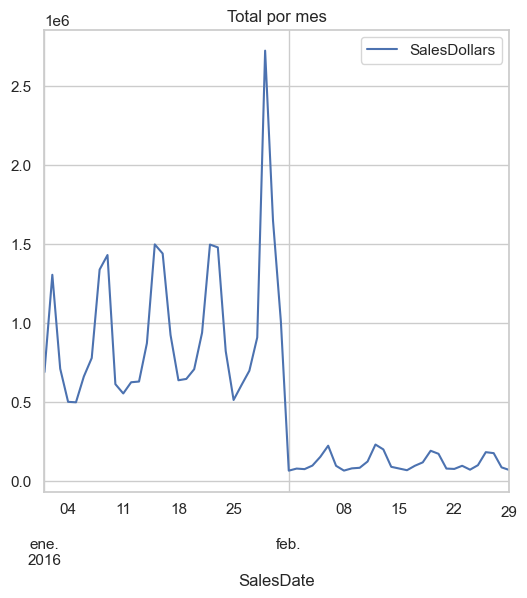

In [296]:
fig, ax = plt.subplots(figsize=(6,6))
df_Sales.resample('D').sum(numeric_only=True)['SalesDollars'].plot(ax=ax)
plt.title('Total por mes')
plt.legend(['SalesDollars'])
plt.show()

In [300]:
df_monthly_sales = df_Sales.resample('D').sum(numeric_only=True)


In [303]:
df_monthly_sales.head(5)

,Brand,ExciseTax,SalesDollars,SalesPrice,SalesQuantity,Store,VendorNumber,Volume,Classification
SalesDate,,,,,,,,,
2016-01-01,275489037,28482.64,687880.01,376913.29,49911,1117035,174018253,21991657,33393
2016-01-02,460913536,57425.06,1303610.64,592507.50,93114,1682879,270806935,36210874,54067
2016-01-03,272159631,32553.62,709085.36,347579.55,53037,1060906,161463136,22637540,32483
2016-01-04,223956683,24001.67,499567.87,286052.24,41341,833470,132669822,19363904,27041
2016-01-05,229870977,22462.75,496719.05,285409.84,40831,819518,134993038,18790970,27440


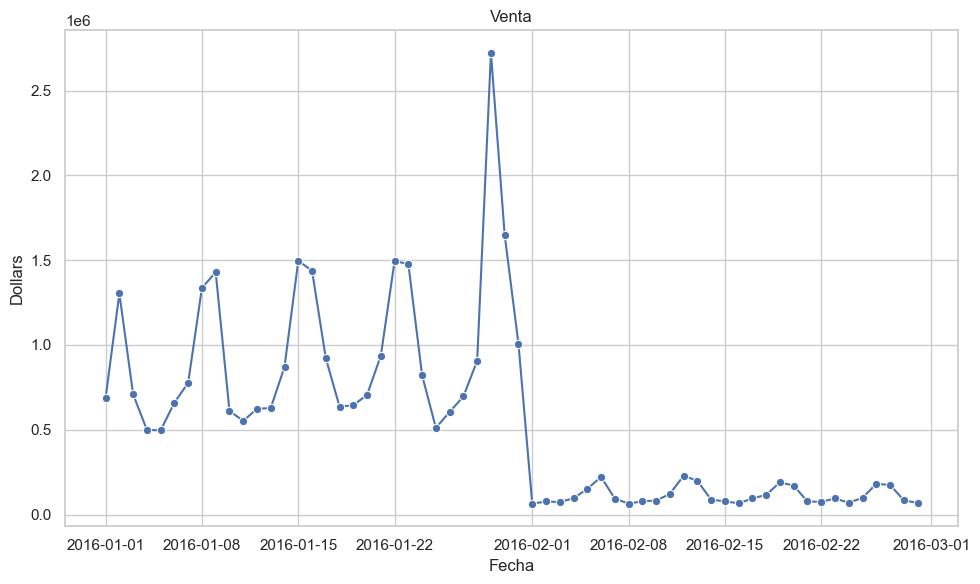

In [302]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_monthly_sales, x='SalesDate', y='SalesDollars', marker='o')
plt.title('Venta')
plt.xlabel('Fecha')
plt.ylabel('Dollars')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [325]:
clasificacion = df_Sales.reset_index()['Classification'].drop_duplicates()
print(clasificacion)

0    1
8    2
Name: Classification, dtype: int64


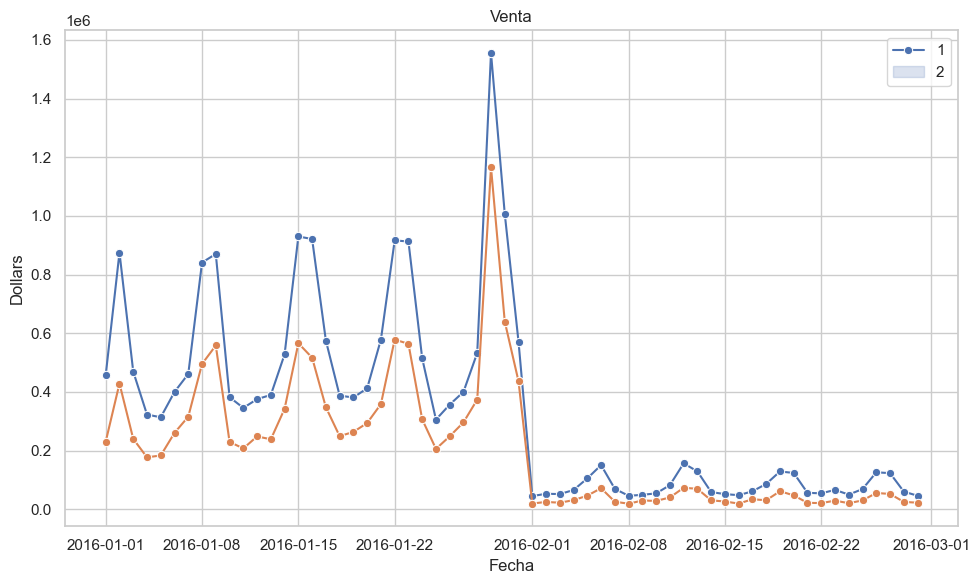

In [327]:
fig, ax = plt.subplots(figsize=(10,6))
for categoria in clasificacion:
    df_monthly_sales = df_Sales[df_Sales['Classification']==categoria].resample('D').sum(numeric_only=True)
    sns.lineplot(data=df_monthly_sales, x='SalesDate', y='SalesDollars', marker='o')
plt.title('Venta')
plt.xlabel('Fecha')
plt.ylabel('Dollars')
plt.legend(clasificacion)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


##### Analisis por Ciudad

Stores por City


In [24]:
Cities = df_Stores[['City']].drop_duplicates()
CantidadCiudades = Cities.shape[0]
print(f'Cantidad de ciudades: {CantidadCiudades}')
print(Cities)

Cantidad de ciudades: 68
            City
0   HARDERSFIELD
1       ASHBORNE
2        HORNSEY
3     EANVERNESS
4         SUTTON
..           ...
74     BARNCOMBE
76      TAMWORTH
77     EASTHAVEN
78     BALLYMENA
79      PEMBROKE

[68 rows x 1 columns]


In [35]:
CantidadStores = df_Stores.shape[0]
print(CantidadStores)

80


In [26]:
sns.set(style="whitegrid")


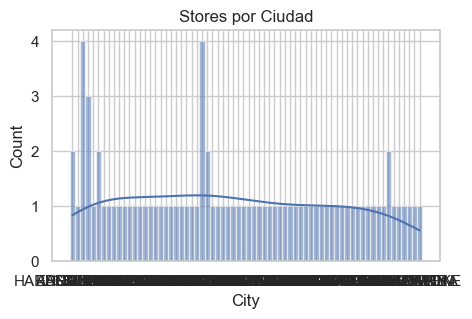

In [28]:
fig, ax = plt.subplots(figsize=(5,3))
sns.histplot(data=df_Stores,x= 'City', kde=True, discrete = True)
plt.title('Stores por Ciudad')
plt.show()

En casi todas las ciudades tiene un solo Store

In [31]:
StoreCount = df_Stores['City'].value_counts().reset_index()
print(StoreCount)

            City  count
0        HORNSEY      4
1      MOUNTMEND      4
2     EANVERNESS      3
3   HARDERSFIELD      2
4       LARNWICK      2
..           ...    ...
63     BARNCOMBE      1
64      TAMWORTH      1
65     EASTHAVEN      1
66     BALLYMENA      1
67      PEMBROKE      1

[68 rows x 2 columns]


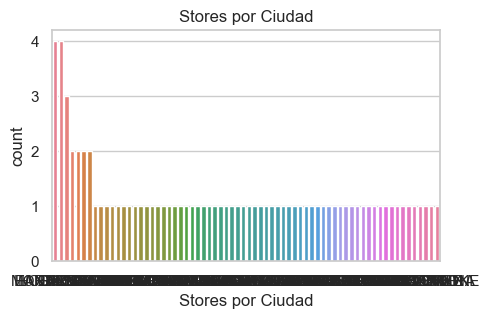

In [32]:
fig, ax = plt.subplots(figsize=(5,3))
sns.barplot(data=StoreCount,x='City',y= 'count', ax=ax, hue='City')
plt.title('Stores por Ciudad')
plt.xlabel('Stores por Ciudad')
plt.show()

In [33]:
MasDeUnStore = StoreCount[StoreCount['count']>1]
print(MasDeUnStore)


           City  count
0       HORNSEY      4
1     MOUNTMEND      4
2    EANVERNESS      3
3  HARDERSFIELD      2
4      LARNWICK      2
5     GOULCREST      2
6     DONCASTER      2


De 68 ciudades solo 6 tienen mas de un store

##### Analisis por Categoria

In [37]:
print(df_Brands.head(20))

    Brand                  Description   Price    Size  Volume  \
0      58  Gekkeikan Black & Gold Sake   12.99   750mL   750.0   
1      62     Herradura Silver Tequila   36.99   750mL   750.0   
2      63   Herradura Reposado Tequila   38.99   750mL   750.0   
3      72         No. 3 London Dry Gin   34.99   750mL   750.0   
4      75    Three Olives Tomato Vodka   14.99   750mL   750.0   
5      77  Three Olives Espresso Vodka   12.99   750mL   750.0   
6      79     Three Olives Loopy Vodka   14.99   750mL   750.0   
7     115              Belvedere Vodka   27.99  1000mL  1000.0   
8     126             Grey Goose Vodka   32.99  1000mL  1000.0   
9     168      Three Olives Strawberry   12.99   750mL   750.0   
10    171               Gentleman Jack   49.99  1750mL  1750.0   
11    173        Hornitos Reposado VAP   22.99   750mL   750.0   
12    175           1800 Anejo Tequila   36.99   750mL   750.0   
13    178    Wild Turkey Russell's RSV   29.99   750mL   750.0   
14    192 

In [68]:
CantxTipo = df_Brands.groupby(['Classification'])['Brand'].count().reset_index()
print(CantxTipo)

   Classification  Brand
0               1   3567
1               2   8693


In [62]:
Sales_Classification = pd.merge(df_Sales,df_Brands,how='left',on = 'Brand')[['Classification','SalesDollars']]
print(Sales_Classification.head(5))


   Classification  SalesDollars
0               1         16.49
1               1         32.98
2               1         16.49
3               1         14.49
4               1         69.98


In [73]:
VentasporTipo=Sales_Classification.groupby(['Classification'])['SalesDollars'].sum().reset_index()
print(VentasporTipo)

   Classification  SalesDollars
0               1   20550829.07
1               2   12588546.22


In [75]:
VentasporTipo = pd.merge(VentasporTipo,CantxTipo,how= 'left', on = 'Classification')
print(VentasporTipo)


   Classification  SalesDollars  Brand
0               1   20550829.07   3567
1               2   12588546.22   8693


In [134]:
df_InventoriesFinal.head(5)

,InventoryId,Brand,onHand,Store,Date
0,1_HARDERSFIELD_58,58,11,1,2016-12-31
1,1_HARDERSFIELD_62,62,7,1,2016-12-31
2,1_HARDERSFIELD_63,63,7,1,2016-12-31
3,1_HARDERSFIELD_72,72,4,1,2016-12-31
4,1_HARDERSFIELD_75,75,7,1,2016-12-31


In [136]:
InventoriesFinalClass = pd.merge(df_InventoriesFinal,df_Brands[['Classification','Brand']], how = 'left', on = 'Brand')


In [137]:
InventoriesFinalClass

,InventoryId,Brand,onHand,Store,Date,Classification
0,1_HARDERSFIELD_58,58,11,1,2016-12-31,1
1,1_HARDERSFIELD_62,62,7,1,2016-12-31,1
2,1_HARDERSFIELD_63,63,7,1,2016-12-31,1
3,1_HARDERSFIELD_72,72,4,1,2016-12-31,1
4,1_HARDERSFIELD_75,75,7,1,2016-12-31,1
...,...,...,...,...,...,...
224484,81_PEMBROKE_90087,90087,3,81,2016-12-31,2
224485,81_PEMBROKE_90088,90088,3,81,2016-12-31,2
224486,81_PEMBROKE_90089,90089,3,81,2016-12-31,2
224487,81_PEMBROKE_90090,90090,3,81,2016-12-31,2


In [139]:
InventoriesFinalxClass = InventoriesFinalClass.groupby(['Classification'])['onHand'].sum().reset_index()

In [140]:
InventoriesFinalxClass

,Classification,onHand
0,1,2683876
1,2,2201900


In [141]:
label = VentasporTipo['Classification']
sizes1 = VentasporTipo['SalesDollars']
sizes2 = VentasporTipo['Brand']
sizes3 = InventoriesFinalxClass ['onHand']
newlabel = ['Licores','Vinos']

In [106]:
print(type(label))
print(newlabel)

<class 'pandas.core.series.Series'>
['Licores', 'Vinos']


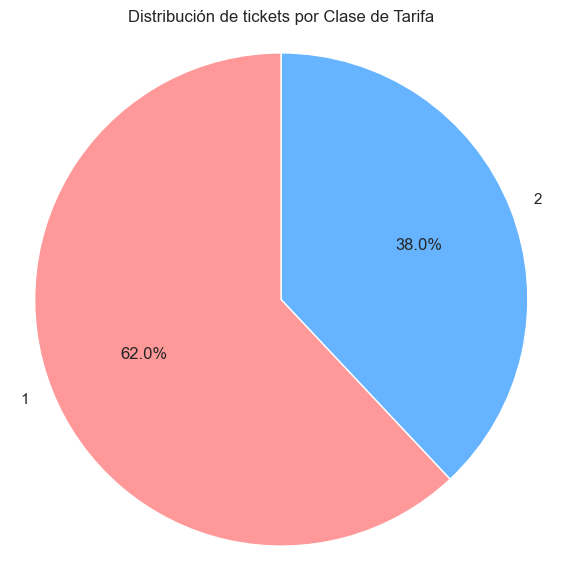

In [94]:


plt.figure(figsize=(7, 7))  
plt.pie(sizes1, labels=label, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])

plt.axis('equal')# Asegurar que el gráfico sea circular

plt.title('Venta por Clasificación')
plt.show()

tuple

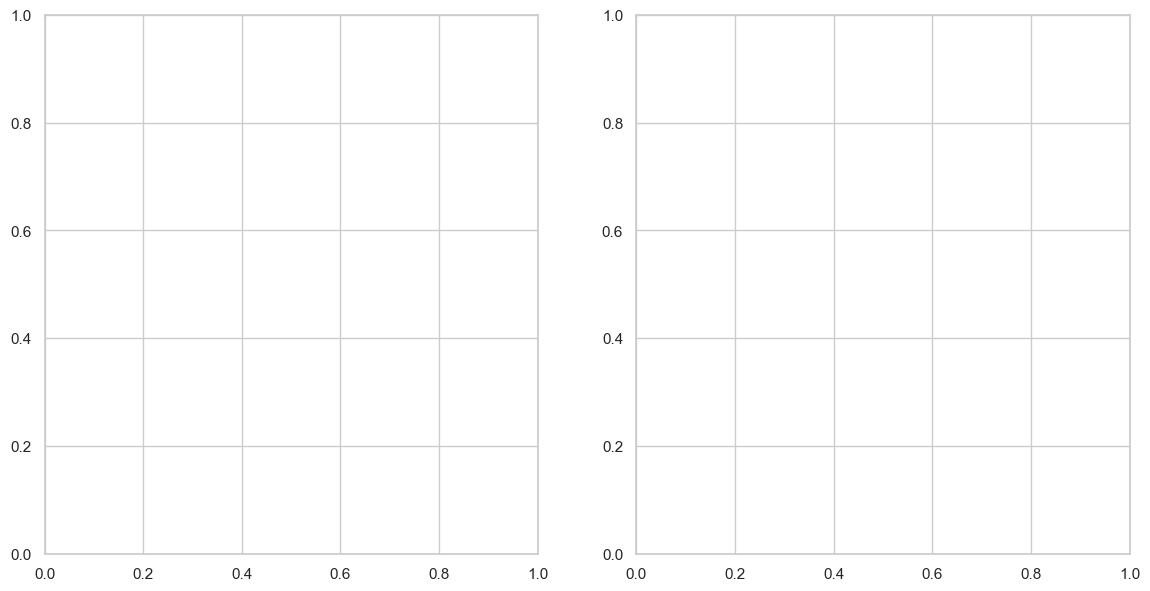

In [82]:
type(plt.subplots(1, 2, figsize=(14, 7)))

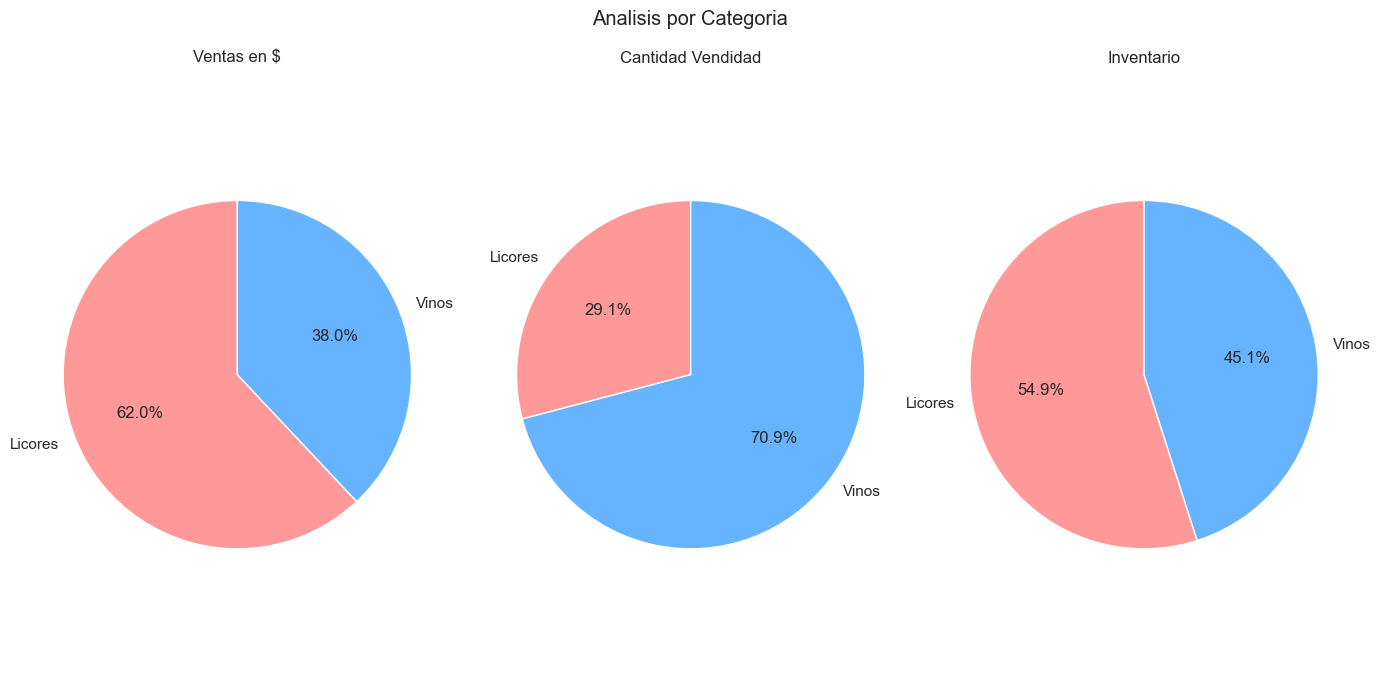

In [143]:
# Crear la figura con dos subplots (uno para cada gráfico de torta)
# desempaqueto la tupla, para tener los objetos fig, ax1 y ax2 y aplicar
# los metodos de graficos que tienen estos objetos(de la clase Axes)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 7))

# Creo los graficos, y tambien desempaqueto la infromacion que necesito para poner leyenda a los graficos
wedges1, texts1, autotexts1 = ax1.pie(sizes1,labels=newlabel,autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
ax1.set_title('Ventas en $')
ax1.axis('equal')
#ax1.legend(wedges1, newlabel, title="Clasificación", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

wedges2, texts2, autotexts2 = ax2.pie(sizes2,labels=newlabel,autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
ax2.set_title('Cantidad Vendidad')
ax2.axis('equal')
#ax2.legend(wedges2, newlabel, title="Clasificación", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

wedges3, texts3, autotexts3 = ax3.pie(sizes3,labels=newlabel,autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
ax3.set_title('Inventario')
ax3.axis('equal')


fig.suptitle('Analisis por Categoria')
fig.tight_layout()

plt.show()

Los productos 1, los licores, representan la mayor cantidad de Ventas. La venta de los vinos está más diverisificada en diferentes productos, mientras que la de licores tiene menos variedad de productos. Esto tiene un impacto en el manejo de stock.
Sin embargo, tienen mayores niveles de stock que los vinos, siendo de menos rotación y más caros.

In [101]:
df_Brands[df_Brands['Classification']==2]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber
57,605,Alate Kosher Wine,16.99,750mL,750.0,2,9.67,10754
58,607,Schmitt Sohne Funf Rsl,8.49,750mL,750.0,2,5.74,9552
69,753,LaBelle Winery Blueberry,19.99,750mL,750.0,2,13.79,90032
95,870,Carpano Antica Formula,29.99,1000mL,1000.0,2,17.64,9165
1064,4491,Calvados Marquis De St Loup,27.99,750mL,750.0,2,19.04,9165
...,...,...,...,...,...,...,...,...
12255,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750.0,2,16.55,90024
12256,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750.0,2,14.93,4425
12257,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750.0,2,61.43,10754
12258,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500.0,2,8.90,9744


##### Analisis de Stores

Los stores, todos tienen ambos productos?

In [114]:
df_Inventories.head(5)

,InventoryId,Brand,Store
0,10_HORNSEY_1000,1000.0,10.0
1,10_HORNSEY_1001,1001.0,10.0
2,10_HORNSEY_1003,1003.0,10.0
3,10_HORNSEY_10030,10030.0,10.0
4,10_HORNSEY_1004,1004.0,10.0


In [123]:
Inventories_class = pd.merge(df_Inventories,df_Brands[['Classification','Brand']],how='left',on = 'Brand')

In [124]:
Inventories_class.head(5)

,InventoryId,Brand,Store,Classification
0,10_HORNSEY_1000,1000.0,10.0,1
1,10_HORNSEY_1001,1001.0,10.0,1
2,10_HORNSEY_1003,1003.0,10.0,1
3,10_HORNSEY_10030,10030.0,10.0,2
4,10_HORNSEY_1004,1004.0,10.0,1


In [127]:
ClassPorStore = Inventories_class.pivot_table(values ='Brand',index= 'Store', columns= 'Classification', aggfunc=np.sum)

C:\Users\PC\AppData\Local\Temp\ipykernel_31920\4094263459.py:1: FutureWarning: The provided callable <function sum at 0x000001CCA4213A60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ClassPorStore = Inventories_class.pivot_table(values ='Brand',index= 'Store', columns= 'Classification', aggfunc=np.sum)


In [129]:
ClassPorStore.isnull().sum()

Classification
1    0
2    0
dtype: int64

todos los Stores trabajan ambos tipos de productos : licores y vinos

##### Análisis de Rotación

Analizar el indice de rotacion de cada categoria y graficarla en barras. ¡Ojo ver fechas de las Ventas y filtrar por ahi!

In [145]:
df_Sales.head(3)

,Brand,ExciseTax,InventoryId,SalesDate,SalesDollars,SalesPrice,SalesQuantity,Store,VendorNumber,Volume
0,1004,0.79,1_HARDERSFIELD_1004,2016-01-01,16.49,16.49,1,1,12546,750
1,1004,1.57,1_HARDERSFIELD_1004,2016-01-02,32.98,16.49,2,1,12546,750
2,1004,0.79,1_HARDERSFIELD_1004,2016-01-03,16.49,16.49,1,1,12546,750


In [114]:
VentasCalculadasxBrand = VentasCalculadas.groupby('Brand').sum(numeric_only=True).reset_index()

In [115]:
CostodeSales = pd.merge(VentasCalculadasxBrand[['Brand','VentasCalculadasUnidades']],df_Brands[['PurchasePrice','Brand','Classification']],how ='left', on = 'Brand')

In [120]:
CostodeSales.head(5
                  )

,Brand,VentasCalculadasUnidades,PurchasePrice,Classification,CostoCompra
0,58.0,3446.0,9.28,1,31978.88
1,60.0,1775.0,7.40,1,13135.00
2,61.0,312.0,10.60,1,3307.20
3,62.0,3125.0,28.67,1,89593.75
4,63.0,2778.0,30.46,1,84617.88


In [117]:
CostodeSales['CostoCompra'] = CostodeSales['VentasCalculadasUnidades']*CostodeSales['PurchasePrice']

In [121]:
CostoBienesVendidos = CostodeSales.groupby('Classification').sum()['CostoCompra'].reset_index()
print(CostoBienesVendidos)

   Classification   CostoCompra
0               1  2.113276e+08
1               2  1.020577e+08


In [160]:
df_InventoriesFinal

,InventoryId,Brand,onHand,Store,Date
0,1_HARDERSFIELD_58,58,11,1,2016-12-31
1,1_HARDERSFIELD_62,62,7,1,2016-12-31
2,1_HARDERSFIELD_63,63,7,1,2016-12-31
3,1_HARDERSFIELD_72,72,4,1,2016-12-31
4,1_HARDERSFIELD_75,75,7,1,2016-12-31
...,...,...,...,...,...
224484,81_PEMBROKE_90087,90087,3,81,2016-12-31
224485,81_PEMBROKE_90088,90088,3,81,2016-12-31
224486,81_PEMBROKE_90089,90089,3,81,2016-12-31
224487,81_PEMBROKE_90090,90090,3,81,2016-12-31


In [17]:
InventariosProm= pd.merge(df_Inventories,df_InventoriesFinal[['onHand', 'InventoryId']], on='InventoryId', how = 'left')

In [18]:
InventariosProm.rename(columns ={'onHand' : 'StockFinal'}, inplace= True)

In [19]:
InventariosProm = pd.merge(InventariosProm,df_InventoriesInitial[['onHand', 'InventoryId']], on='InventoryId', how = 'left')

In [20]:
InventariosProm.rename(columns ={'onHand' : 'StockInicial'}, inplace= True)

In [205]:
InventariosProm.head(2)

,InventoryId,Brand,Store,StockFinal,StockInicial,StockProm,PurchasePrice,Classification,CostoStockProm
0,10_HORNSEY_1000,1000.0,10.0,0.0,1.0,-0.5,11.62,1,-5.81
1,10_HORNSEY_1001,1001.0,10.0,0.0,11.0,-5.5,4.28,1,-23.54


In [21]:
InventariosProm.fillna(0, inplace= True)

In [22]:
InventariosProm['StockProm'] =(InventariosProm['StockFinal']-InventariosProm['StockInicial'])/2

In [23]:
InventariosProm = pd.merge(InventariosProm,df_Brands[['Brand','PurchasePrice','Classification']], how='left', on = 'Brand')

In [24]:
InventariosProm['CostoStockProm'] = InventariosProm['StockProm']*InventariosProm['PurchasePrice']

In [25]:
InventariosPromxClass = InventariosProm.groupby('Classification')['CostoStockProm'].sum().reset_index()
print(InventariosPromxClass)

   Classification  CostoStockProm
0               1     2818639.545
1               2     1439093.250


In [ ]:
InventoriesIDs = pd.concat([InventoriesIDs,df_BegInv['InventoryId']],ignore_index= True)

In [122]:
RotacionInventarios = pd.merge(CostoBienesVendidos,InventariosPromxClass, on= 'Classification', how = 'left')
print(RotacionInventarios)

   Classification   CostoCompra  CostoStockProm
0               1  2.113276e+08     2818639.545
1               2  1.020577e+08     1439093.250


In [123]:
RotacionInventarios['Rotacion'] = (RotacionInventarios['CostoCompra']/RotacionInventarios['CostoStockProm']*100)

In [124]:
RotacionInventarios

,Classification,CostoCompra,CostoStockProm,Rotacion
0,1,2.113276e+08,2818639.545,7497.501899
1,2,1.020577e+08,1439093.250,7091.809133


In [215]:
RotacionInventarios['Classification']

0    1
1    2
Name: Classification, dtype: int64

In [216]:
RotacionInventarios['CostoCompra']

0    14685308.75
1     7614332.02
Name: CostoCompra, dtype: float64

In [234]:
x= list(RotacionInventarios['Classification'])
datos = list(RotacionInventarios['CostoCompra'])

In [237]:
datos

[14685308.75, 7614332.0200000005]

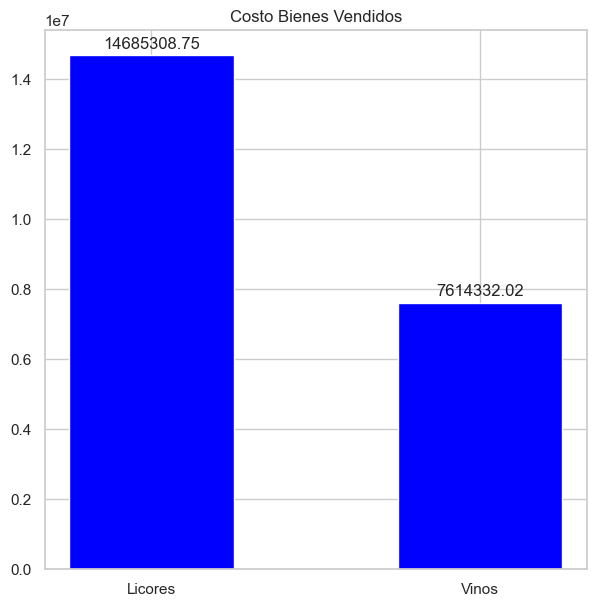

In [246]:
indice = np.arange(len(x))

plt.figure(figsize=(7, 7))  
barras = plt.bar(indice, datos, width = 0.5, label='Costo Bienes Vendidos', color = 'blue')
plt.xticks(indice, ['Licores', 'Vinos'])
plt.title('Costo Bienes Vendidos')

# para poner los valores en las barras
for barra in barras:
    altura = barra.get_height()
    plt.annotate(f'{altura:.2f}', 
                 xy=(barra.get_x() + barra.get_width() / 2, altura),
                 xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                 textcoords="offset points",
                 ha='center', va='bottom')


plt.show()

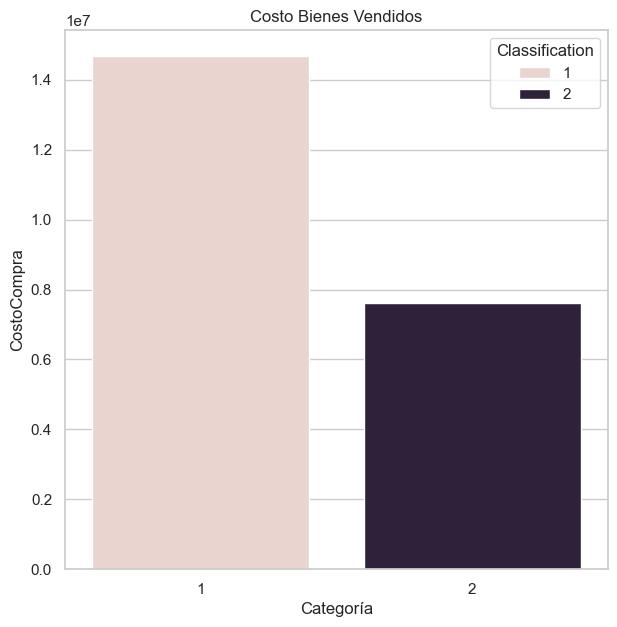

In [269]:
plt.figure(figsize=(7, 7))  
sns.barplot(data=RotacionInventarios,x='Classification',y='CostoCompra', hue='Classification')
plt.title('Costo Bienes Vendidos')
plt.xlabel('Categoría')
plt.show()


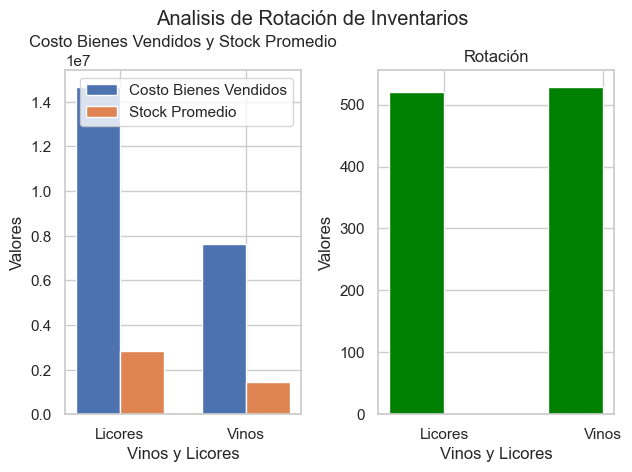

In [265]:

# Datos
categorias = ['Licores', 'Vinos']
grupo1 =RotacionInventarios['CostoCompra']
grupo2 = RotacionInventarios['CostoStockProm']
grupo3 = RotacionInventarios['Rotacion']
# Configuración de las posiciones de las barras
bar_width = 0.35
indice = np.arange(len(categorias))

# Crear el gráfico de barras
fig, (ax, ax2)  = plt.subplots(1,2)
bar1 = ax.bar(indice, grupo1, bar_width, label='Costo Bienes Vendidos')
bar2 = ax.bar(indice + bar_width, grupo2, bar_width, label='Stock Promedio')
bar3 = ax2.bar(indice , grupo3, bar_width, label='Rotación', color = 'green')


# Añadir etiquetas y leyenda
ax.set_xlabel('Vinos y Licores')
ax2.set_xlabel('Vinos y Licores')

ax.set_ylabel('Valores')
ax2.set_ylabel('Valores')

fig.suptitle('Analisis de Rotación de Inventarios')
fig.tight_layout()

ax.set_title('Costo Bienes Vendidos y Stock Promedio')
ax2.set_title('Rotación')

ax.set_xticks(indice + bar_width / 2)
ax2.set_xticks(indice + bar_width / 2)

ax.set_xticklabels(categorias)
ax2.set_xticklabels(categorias)

ax.legend()


# Mostrar el gráfico
plt.show()


La Rotacion de Inventarios es similar por Categoría

In [ ]:
ventas_por_producto = df_Sales.groupby('InventoryId')['SalesQuantity'].sum().reset_index()


In [ ]:
## armar uno de inventario final vs inventario inicial vs ventas

In [330]:
InventariosProm.columns

Index(['InventoryId', 'Brand', 'Store', 'StockFinal', 'StockInicial',
       'StockProm', 'PurchasePrice', 'Classification', 'CostoStockProm'],
      dtype='object')

In [26]:
InventariosPromxStore = InventariosProm.groupby('Store').sum()[['StockInicial','StockFinal']].reset_index()

In [31]:
InventariosPromxStoreTop_10 = InventariosPromxStore.sort_values(by='StockFinal', ascending=False).head(10)


In [27]:
InventariosPromxStore

,Store,StockInicial,StockFinal
0,1.0,49917.0,79827.0
1,2.0,52925.0,56671.0
2,3.0,8379.0,8470.0
3,4.0,56819.0,60570.0
4,5.0,17968.0,21708.0
...,...,...,...
75,76.0,140208.0,143866.0
76,77.0,39242.0,46603.0
77,78.0,21395.0,39746.0
78,79.0,95330.0,93368.0


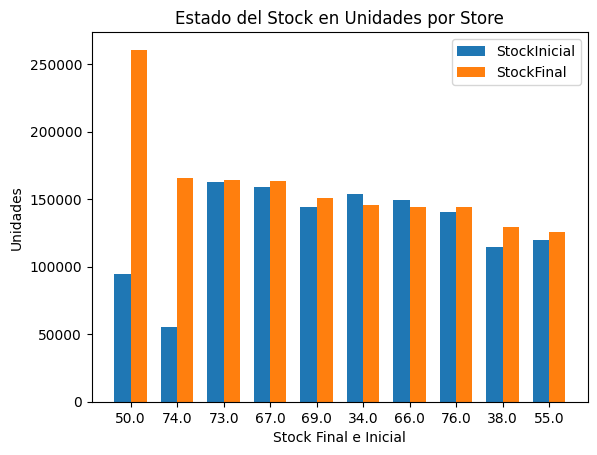

In [32]:
# Datos
categorias = InventariosPromxStoreTop_10['Store']
grupo1 =InventariosPromxStoreTop_10['StockInicial']
grupo2 = InventariosPromxStoreTop_10['StockFinal']

# Configuración de las posiciones de las barras
bar_width = 0.35
indice = np.arange(len(categorias))

# Crear el gráfico de barras
fig, ax  = plt.subplots()
bar1 = ax.bar(indice, grupo1, bar_width, label='StockInicial')
bar2 = ax.bar(indice + bar_width, grupo2, bar_width, label='StockFinal')


# Añadir etiquetas y leyenda
ax.set_xlabel('Stock Final e Inicial')

ax.set_ylabel('Unidades')


ax.set_title('Estado del Stock en Unidades por Store')

ax.set_xticks(indice + bar_width / 2)

ax.set_xticklabels(categorias)

ax.legend()


# Mostrar el gráfico
plt.show()


In [33]:
InventariosProm

,InventoryId,Brand,Store,StockFinal,StockInicial,StockProm,PurchasePrice,Classification,CostoStockProm
0,10_HORNSEY_1000,1000.0,10.0,0.0,1.0,-0.5,11.62,1,-5.810
1,10_HORNSEY_1001,1001.0,10.0,0.0,11.0,-5.5,4.28,1,-23.540
2,10_HORNSEY_1003,1003.0,10.0,73.0,0.0,36.5,16.66,1,608.090
3,10_HORNSEY_10030,10030.0,10.0,0.0,0.0,0.0,5.19,2,0.000
4,10_HORNSEY_1004,1004.0,10.0,0.0,0.0,0.0,10.65,1,0.000
...,...,...,...,...,...,...,...,...,...
276384,9_BLACKPOOL_9388,9388.0,9.0,4.0,7.0,-1.5,17.14,1,-25.710
276385,9_BLACKPOOL_942,942.0,9.0,2.0,0.0,1.0,45.45,1,45.450
276386,9_BLACKPOOL_966,966.0,9.0,9.0,8.0,0.5,16.15,1,8.075
276387,9_BLACKPOOL_984,984.0,9.0,5.0,23.0,-9.0,20.63,1,-185.670


In [34]:
df_InvoicePurchasesDetails.head(1)

,Brand,Dollars,InventoryId,PONumber,PurchasePrice,Quantity,ReceivingDate,Store,VendorNumber
0,8412,214.26,69_MOUNTMEND_8412,8124,35.71,6,2016-01-02,69,105


In [73]:
df_InvoicePurchasesDetails.shape

(2372474, 9)

In [78]:
df_InvoicePurchasesDetails['ReceivingDate'] = pd.to_datetime(df_InvoicePurchasesDetails['ReceivingDate'])


In [79]:
ComprasHasta31_12_16 = df_InvoicePurchasesDetails[df_InvoicePurchasesDetails['ReceivingDate']<'2017-01-01']

In [80]:
ComprasHasta31_12_16.shape

(2372474, 9)

In [83]:
ComprasporInvID = ComprasHasta31_12_16.groupby('InventoryId').sum(numeric_only=True)['Quantity'].reset_index()

In [84]:
ComprasporInvID

,InventoryId,Quantity
0,10_HORNSEY_1001,120
1,10_HORNSEY_1003,227
2,10_HORNSEY_10030,13
3,10_HORNSEY_1004,12
4,10_HORNSEY_10057,12
...,...,...
245902,9_BLACKPOOL_9388,24
245903,9_BLACKPOOL_942,9
245904,9_BLACKPOOL_966,84
245905,9_BLACKPOOL_984,43


In [85]:
## venta en unidades del mismo periodo que el stock

VentasCalculadas = pd.merge(InventariosProm, ComprasporInvID[['InventoryId', 'Quantity']], on = 'InventoryId', how = 'left')

In [87]:
VentasCalculadas = VentasCalculadas.fillna(0)

In [88]:
VentasCalculadas.isnull().sum()

InventoryId       0
Brand             0
Store             0
StockFinal        0
StockInicial      0
StockProm         0
PurchasePrice     0
Classification    0
CostoStockProm    0
Quantity          0
dtype: int64

In [89]:
VentasCalculadas['VentasCalculadasUnidades'] = VentasCalculadas['StockInicial']+VentasCalculadas['Quantity']-VentasCalculadas['StockFinal']

In [90]:
VentasCalculadasNegativas = VentasCalculadas[VentasCalculadas['VentasCalculadasUnidades']<0]

In [91]:
VentasCalculadasNegativas.head(5)

,InventoryId,Brand,Store,StockFinal,StockInicial,StockProm,PurchasePrice,Classification,CostoStockProm,Quantity,VentasCalculadasUnidades


In [92]:
VentasCalculadas.head(3)

,InventoryId,Brand,Store,StockFinal,StockInicial,StockProm,PurchasePrice,Classification,CostoStockProm,Quantity,VentasCalculadasUnidades
0,10_HORNSEY_1000,1000.0,10.0,0.0,1.0,-0.5,11.62,1,-5.81,0.0,1.0
1,10_HORNSEY_1001,1001.0,10.0,0.0,11.0,-5.5,4.28,1,-23.54,120.0,131.0
2,10_HORNSEY_1003,1003.0,10.0,73.0,0.0,36.5,16.66,1,608.09,227.0,154.0


VentasCalculadasxStore = VentasCalculadas.groupby('Store').sum()[['StockInicial','StockFinal','VentasCalculadasUnidades']].reset_index()

ventas_1001 = VentasCalculadas[VentasCalculadas['Brand']== 1001]
ventas_1001 = ventas_1001.groupby('Brand').sum(numeric_only=True).reset_index()
print(ventas_1001)

In [94]:
print(VentasCalculadasxStore[VentasCalculadasxStore['VentasCalculadasUnidades']<0])

Empty DataFrame
Columns: [Store, StockInicial, StockFinal, VentasCalculadasUnidades]
Index: []


In [97]:
VentasInvxStoreTop_10 = VentasCalculadasxStore.sort_values(by='VentasCalculadasUnidades', ascending=False).head(10)


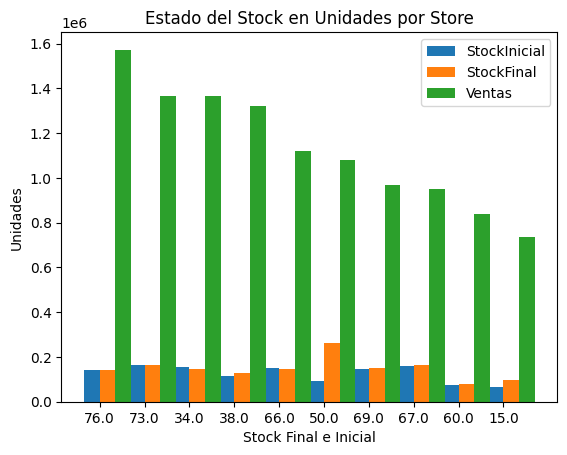

In [98]:
# Datos
categorias = VentasInvxStoreTop_10['Store']
grupo1 =VentasInvxStoreTop_10['StockInicial']
grupo2 = VentasInvxStoreTop_10['StockFinal']
grupo3 = VentasInvxStoreTop_10['VentasCalculadasUnidades']
# Configuración de las posiciones de las barras
bar_width = 0.35
indice = np.arange(len(categorias))

# Crear el gráfico de barras
fig, ax  = plt.subplots()
bar1 = ax.bar(indice, grupo1, bar_width, label='StockInicial')
bar2 = ax.bar(indice + bar_width, grupo2, bar_width, label='StockFinal')
bar3 = ax.bar(indice + bar_width + bar_width, grupo3, bar_width, label='Ventas')

# Añadir etiquetas y leyenda
ax.set_xlabel('Stock Final e Inicial')

ax.set_ylabel('Unidades')


ax.set_title('Estado del Stock en Unidades por Store')

ax.set_xticks(indice + bar_width / 2)

ax.set_xticklabels(categorias)

ax.legend()


# Mostrar el gráfico
plt.show()

In [99]:
VentasInvxStoreMin_10 = VentasCalculadasxStore.sort_values(by='VentasCalculadasUnidades', ascending=True).head(10)


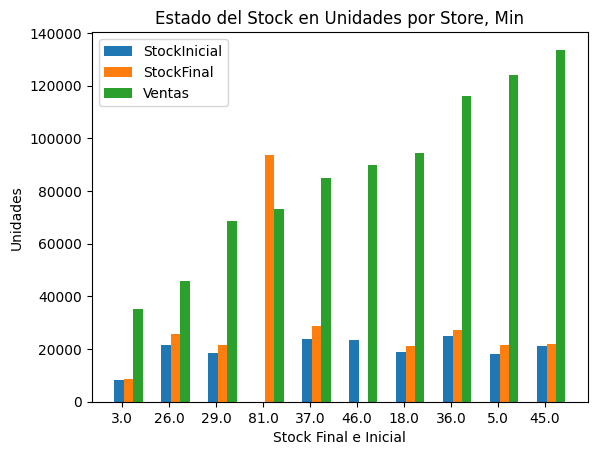

In [103]:
# Datos
categorias = VentasInvxStoreMin_10['Store']
grupo1 =VentasInvxStoreMin_10['StockInicial']
grupo2 = VentasInvxStoreMin_10['StockFinal']
grupo3 = VentasInvxStoreMin_10['VentasCalculadasUnidades']
# Configuración de las posiciones de las barras
bar_width = 0.20
indice = np.arange(len(categorias))

# Crear el gráfico de barras
fig, ax  = plt.subplots()
bar1 = ax.bar(indice, grupo1, bar_width, label='StockInicial')
bar2 = ax.bar(indice + bar_width, grupo2, bar_width, label='StockFinal')
bar3 = ax.bar(indice + bar_width + bar_width, grupo3, bar_width, label='Ventas')

# Añadir etiquetas y leyenda
ax.set_xlabel('Stock Final e Inicial')

ax.set_ylabel('Unidades')


ax.set_title('Estado del Stock en Unidades por Store, Min')

ax.set_xticks(indice + bar_width / 3)

ax.set_xticklabels(categorias)

ax.legend()


# Mostrar el gráfico
plt.show()

In [129]:
df_InventoriesFinal.columns

Index(['InventoryId', 'Brand', 'onHand', 'Store', 'Date'], dtype='object')

In [133]:
If_1001 = df_InventoriesFinal[df_InventoriesFinal['Brand']== 1001]
If_1001.shape

(43, 5)

In [132]:
If_1001 = df_InventoriesFinal[df_InventoriesFinal['Brand']== 1001].groupby('Brand').sum(numeric_only=True)
print(If_1001)

       onHand  Store
Brand               
1001      425   1800


In [ ]:
#Analisis de un orden de Compra particular en las tablas de Compras y compras detail

In [7]:
df_InvoicePurchases[df_InvoicePurchases['PONumber']==8109]

,VendorNumber,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
17,1590,2016-01-12,8109,2015-12-20,2016-02-11,2246,14298.09,408.72,NaN


In [11]:
df_InvoicePurchasesDetails[df_InvoicePurchasesDetails['PONumber']==8109].shape

(67, 9)

In [10]:
df_InvoicePurchasesDetails[df_InvoicePurchasesDetails['PONumber']==8109].sum(numeric_only=True)

Brand            1929430.00
Dollars            14298.09
PONumber          543303.00
PurchasePrice        447.29
Quantity            2246.00
Store               2401.00
VendorNumber      106530.00
dtype: float64

In [13]:
pd.set_option('display.float_format', '{:,.0f}'.format)


In [14]:
df_InvoicePurchases.sum(numeric_only=True)

VendorNumber   114,533,635
PONumber        60,360,050
Quantity        33,584,377
Dollars        321,900,766
Freight          1,640,475
dtype: float64

In [15]:
df_InvoicePurchasesDetails.sum(numeric_only=True)

Brand           29,462,903,148
Dollars            321,900,766
PONumber        26,194,335,131
PurchasePrice       28,588,431
Quantity            33,584,377
Store              105,934,114
VendorNumber    16,337,889,255
dtype: float64